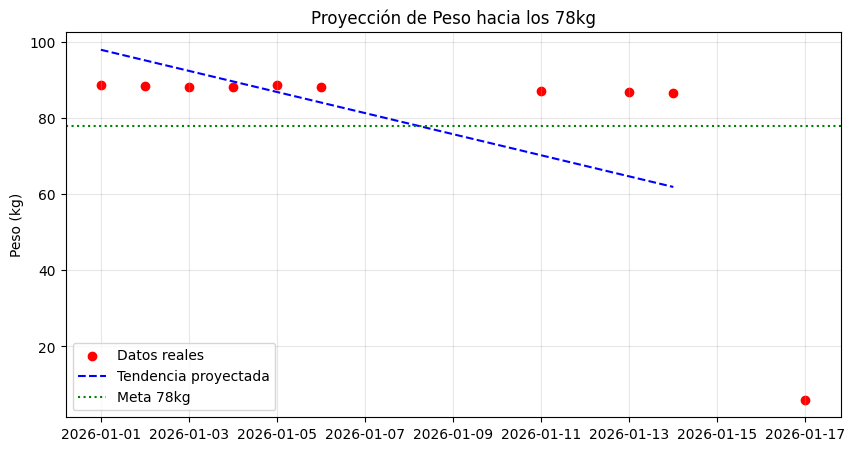

--- RESULTADOS DEL MODELO ---
Peso actual: 6.0 kg
Fecha estimada para alcanzar los 78kg: 08-01-2026


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.linear_model import LinearRegression

# 1. CARGA INDEPENDIENTE DE DATOS
# Si el script está en la carpeta 'notebooks' y el csv en 'data', la ruta es '../data/training_log.csv'
ruta_csv = '../data/raw/training_log.csv' 

try:
    df = pd.read_csv(ruta_csv)
    df['date'] = pd.to_datetime(df['date'])
    
    # 2. PREPARACIÓN DE MATRICES PARA EL MODELO
    # Convertimos las fechas a un número (días desde el inicio) para que el modelo lo entienda
    df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
    
    X = df['days_since_start'].values.reshape(-1, 1) # Variable independiente (tiempo)
    y = df['weight_kg'].values.reshape(-1, 1)       # Variable dependiente (peso)

    # 3. ENTRENAMIENTO DEL MODELO (REGRESIÓN LINEAL)
    model = LinearRegression()
    model.fit(X, y)

    # 4. PREDICCIÓN DE LA META
    objetivo_peso = 78
    # Fórmula: y = mx + b  =>  x = (y - b) / m
    dia_meta = (objetivo_peso - model.intercept_[0]) / model.coef_[0][0]
    
    fecha_inicio = df['date'].min()
    fecha_meta = fecha_inicio + timedelta(days=int(dia_meta))

    # 5. VISUALIZACIÓN
    plt.figure(figsize=(10, 5))
    plt.scatter(df['date'], df['weight_kg'], color='red', label='Datos reales')
    
    # Dibujar la línea de tendencia hasta la meta
    fechas_proyeccion = [fecha_inicio + timedelta(days=i) for i in range(int(dia_meta) + 7)]
    X_proy = np.array(range(len(fechas_proyeccion))).reshape(-1, 1)
    y_proy = model.predict(X_proy)
    
    plt.plot(fechas_proyeccion, y_proy, 'b--', label='Tendencia proyectada')
    plt.axhline(y=78, color='green', linestyle=':', label='Meta 78kg')
    
    plt.title('Proyección de Peso hacia los 78kg')
    plt.ylabel('Peso (kg)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"--- RESULTADOS DEL MODELO ---")
    print(f"Peso actual: {df['weight_kg'].iloc[-1]} kg")
    print(f"Fecha estimada para alcanzar los 78kg: {fecha_meta.strftime('%d-%m-%Y')}")

except FileNotFoundError:
    print(f"❌ No se encontró el archivo en: {ruta_csv}")
except Exception as e:
    print(f"❌ Ocurrió un error: {e}")